In [9]:
# Step 1: Import Libraries
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score


In [10]:
# Step 2: Load Dataset
# =============================
df = pd.read_csv("machine_data.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

✅ Dataset loaded successfully!
Shape: (40, 7)
   MachineID  Temperature  Pressure  Vibration  UsageHours FailureType  \
0          1           70        30       0.25         500         NaN   
1          2           95        45       0.80         700    Overheat   
2          3           60        20       0.10         300         NaN   
3          4           88        40       0.70         650    Overheat   
4          5           92        42       0.75         600    Overheat   

   TimeToFailure  
0            200  
1             50  
2            250  
3             60  
4             55  


In [12]:
# Step 3: Data Preprocessing
# =============================
# Encode failure types
df['FailureType'] = df['FailureType'].replace("None", "No Failure")
label_enc = LabelEncoder()
df['FailureTypeEncoded'] = label_enc.fit_transform(df['FailureType'])

# Scale features
scaler = StandardScaler()
features = ['Temperature', 'Pressure', 'Vibration', 'UsageHours']
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)



In [13]:
# Step 4: Classification - Predict Failure Type
# =============================
X_class = df_scaled
y_class = df['FailureTypeEncoded']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train_c, y_train_c)
y_pred_c = rf_class.predict(X_test_c)

print("\n✅ Classification Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c))




✅ Classification Accuracy: 1.0

Confusion Matrix:
[[5 0]
 [0 3]]


In [14]:
# Step 5: Regression - Predict Time to Failure
# =============================
X_reg = df_scaled
y_reg = df['TimeToFailure']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_r, y_train_r)
y_pred_r = rf_reg.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("\n✅ Regression MSE:", round(mse, 2))
print("✅ Regression R² Score:", round(r2, 2))




✅ Regression MSE: 64.21
✅ Regression R² Score: 0.99


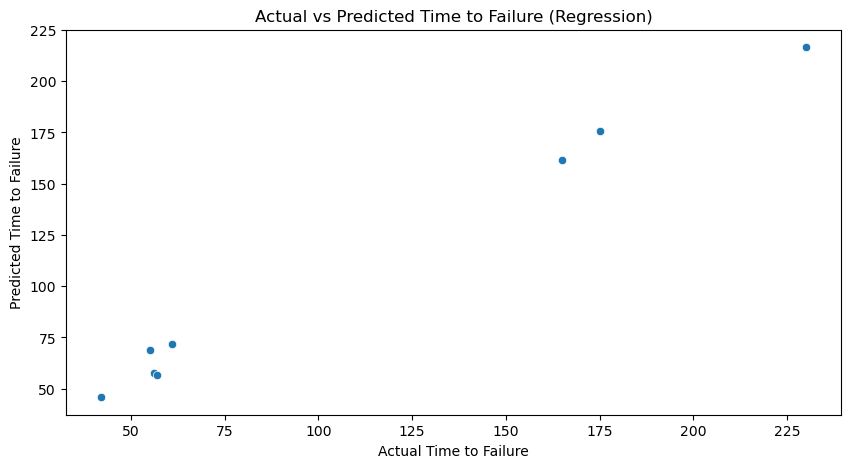

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_22176\1877209422.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FailureType', data=df, palette="Set2")


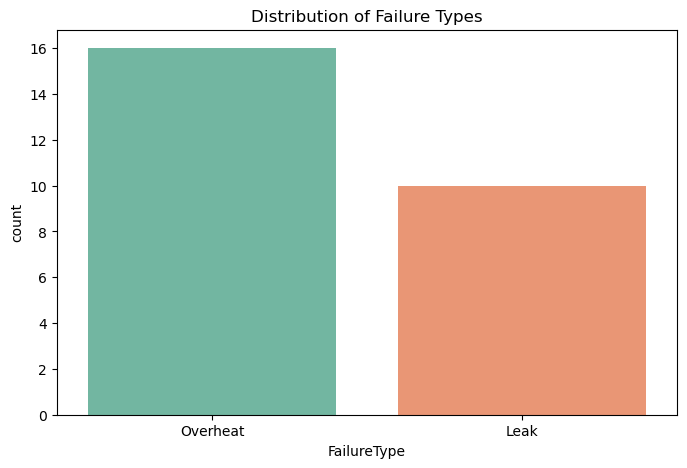

In [15]:
# Step 6: Visualization
# =============================
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test_r, y=y_pred_r)
plt.xlabel("Actual Time to Failure")
plt.ylabel("Predicted Time to Failure")
plt.title("Actual vs Predicted Time to Failure (Regression)")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='FailureType', data=df, palette="Set2")
plt.title("Distribution of Failure Types")
plt.show()


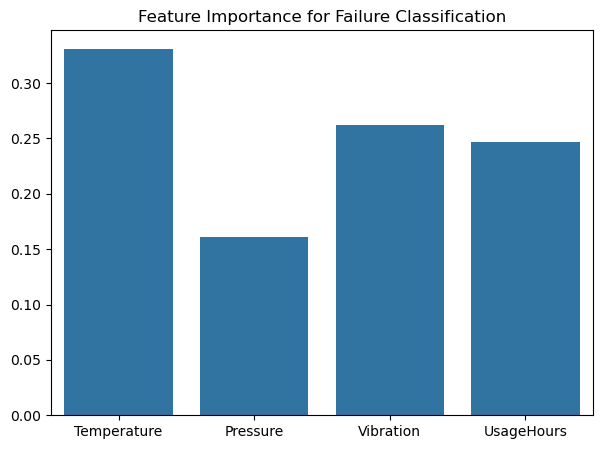

In [16]:
# Step 7: Feature Importance
# =============================
importances = rf_class.feature_importances_
plt.figure(figsize=(7,5))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance for Failure Classification")
plt.show()
